In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### 1. Simulate dataset

In [2]:
# Simulate dataset
np.random.seed(42)
n = 1000

# Example features
income = np.random.normal(50000, 15000, n)
credit_score = np.random.normal(680, 50, n)
loan_amount = np.random.normal(15000, 5000, n)

# True outcome (delinquent = 1, not = 0)
# Higher loan amount and lower income/credit score increases risk
delinquency_prob = (
    1 / (1 + np.exp(
        0.0001 * income -
        0.01 * credit_score +
        0.0002 * loan_amount -
        2.5))  # base probability
)
delinquent = np.random.binomial(1, delinquency_prob)

# Assemble into a DataFrame
df = pd.DataFrame({
    'income': income,
    'credit_score': credit_score,
    'loan_amount': loan_amount,
    'delinquent': delinquent
})

### 2. Model

In [3]:
# 1)Train-test split
# split the data into training(70%) and test(30%)
X = df[['income', 'credit_score', 'loan_amount']]
y = df['delinquent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# -2) Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# -3) Predict probabilities and classify
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)  
#classify as delinquent if p >= 0,5
# 0.5 is the midpoint of prob, not ideal in real world, can be tuned by F1 scores and KS stat

In [7]:
# -4) Evaluate performance
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

AUC-ROC: 0.86

Confusion Matrix:
 [[ 53  32]
 [ 26 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.65        85
           1       0.86      0.88      0.87       215

    accuracy                           0.81       300
   macro avg       0.76      0.75      0.76       300
weighted avg       0.80      0.81      0.80       300



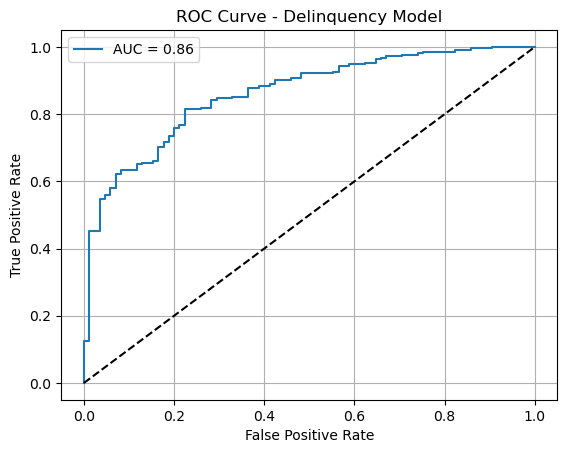

In [8]:
# -5) Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Delinquency Model")
plt.legend()
plt.grid(True)
plt.show()